# **Install PyMOL**

- Mount your Google Drive.
- Navigate to /content/drive/MyDrive.
- Create a folder called "Colab Notebooks".
- Find PyMOL license.lic file and upload the license into this folder
- Click button to install. Wait 10 minutes.

In [1]:
from IPython.utils import io
import tqdm.notebook
import os

"""
The PyMOL installation is done inside two nested context managers. This approach
was inspired by Dr. Christopher Schlick's (of the Phenix group at 
Lawrence Berkeley National Laboratory) method for installing cctbx 
in a Colab Notebook. He presented his work on September 1, 2021 at the IUCr 
Crystallographic Computing School. I adapted Chris's approach here. It replaces my first approach 
that requires seven steps. My approach was presentated at the SciPy2021 conference 
in July 2021 and published in the 
[proceedings](http://conference.scipy.org/proceedings/scipy2021/blaine_mooers.html).
The new approach is easier for beginners to use. The old approach is easier to debug 
and could be used as a back-up approach.
"""
total = 100

with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:

        !pip install -q condacolab
        import condacolab
        condacolab.install()
        pbar.update(10)

        import sys
        sys.path.append('/usr/local/lib/python3.7/site-packages/')
        pbar.update(20)

        # Install PyMOL
        %shell conda install -c schrodinger pymol-bundle --yes

        pbar.update(90)

        # Mount Google Drive and upload your PyMOL license
        from google.colab import drive
        drive.mount("/content/drive")
        %shell cp ./drive/MyDrive/Colab\ Notebooks/license.lic . 
        pbar.update(100) 

  0%|          | 0/100 [00:00<?, ?it/s]

CalledProcessError: ignored

### **Test PyMOL**

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
!mamba install -q -c schrodinger pymol-bundle 

  Package               Version  Build                   Channel                    Size
──────────────────────────────────────────────────────────────────────────────────────────
  Install:
──────────────────────────────────────────────────────────────────────────────────────────

  alsa-lib                1.2.3  h516909a_0              conda-forge/linux-64     Cached
  apbs                      1.5  h14c3975_3              schrodinger/linux-64     Cached
  biopython                1.79  py37h5e8e339_1          conda-forge/linux-64       3 MB
  cached-property         1.5.2  hd8ed1ab_1              conda-forge/noarch       Cached
  cached_property         1.5.2  pyha770c72_1            conda-forge/noarch       Cached
  collada2gltf            2.1.4  h6bb024c_0              schrodinger/linux-64       3 MB
  curl                   7.75.0  h979ede3_0              conda-forge/linux-64     Cached
  dbus                   1.13.6  h48d8840_2              conda-forge/linux-64     572 KB
  exp

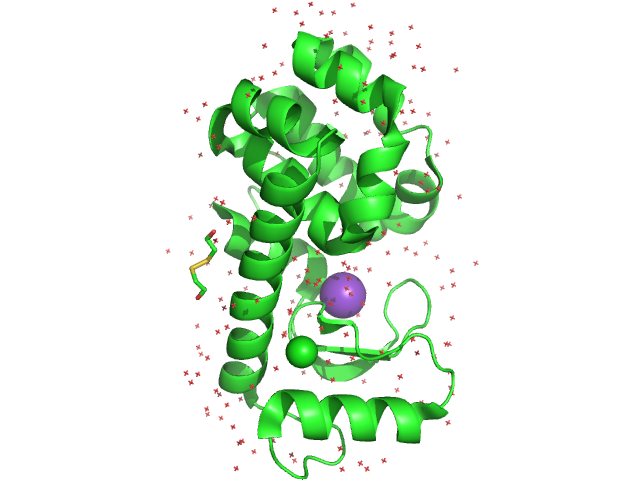

In [3]:
from pymol import cmd
from IPython.display import Image
cmd.fetch("1lw9")
cmd.orient("1lw9")
cmd.rotate("z","270")
cmd.png("test.png")
Image(filename = "test.png", unconfined=True)

# **Virtual docking with Autodock Vina 1.2.3 on Google Colab**

In [ ]:
!wget https://github.com/ccsb-scripps/AutoDock-Vina/releases/download/v1.2.3/vina_1.2.3_linux_x86_64

- Open the folder icon in the next margin.
- Open the content folder
- Click on the three dots on the right and select upload.
- Upload the following files from your harddrive: 
  + vina
  + protein.pdbqt
  * ligand.pdbqt

In [5]:
!chmod a+x /content/vinaFiles/vina_1.2.3_linux_x86_64

In [17]:
!/content/vinaFiles/vina_1.2.3_linux_x86_64 --help

AutoDock Vina v1.2.3

Input:
  --receptor arg             rigid part of the receptor (PDBQT)
  --flex arg                 flexible side chains, if any (PDBQT)
  --ligand arg               ligand (PDBQT)
  --batch arg                batch ligand (PDBQT)
  --scoring arg (=vina)      scoring function (ad4, vina or vinardo)

Search space (required):
  --maps arg                 affinity maps for the autodock4.2 (ad4) or vina 
                             scoring function
  --center_x arg             X coordinate of the center (Angstrom)
  --center_y arg             Y coordinate of the center (Angstrom)
  --center_z arg             Z coordinate of the center (Angstrom)
  --size_x arg               size in the X dimension (Angstrom)
  --size_y arg               size in the Y dimension (Angstrom)
  --size_z arg               size in the Z dimension (Angstrom)
  --autobox                  set maps dimensions based on input ligand(s) (for 
                             --score_only and --local_o

In [24]:
%alias vina123 /content/vinaFiles/vina_1.2.3_linux_x86_64


In [27]:
%vina123 --help

AutoDock Vina v1.2.3

Input:
  --receptor arg             rigid part of the receptor (PDBQT)
  --flex arg                 flexible side chains, if any (PDBQT)
  --ligand arg               ligand (PDBQT)
  --batch arg                batch ligand (PDBQT)
  --scoring arg (=vina)      scoring function (ad4, vina or vinardo)

Search space (required):
  --maps arg                 affinity maps for the autodock4.2 (ad4) or vina 
                             scoring function
  --center_x arg             X coordinate of the center (Angstrom)
  --center_y arg             Y coordinate of the center (Angstrom)
  --center_z arg             Z coordinate of the center (Angstrom)
  --size_x arg               size in the X dimension (Angstrom)
  --size_y arg               size in the Y dimension (Angstrom)
  --size_z arg               size in the Z dimension (Angstrom)
  --autobox                  set maps dimensions based on input ligand(s) (for 
                             --score_only and --local_o

In [28]:
!wget https://static-bcrf.biochem.wisc.edu/tutorials/autodock/protein.pdbqt_.txt

--2022-04-27 21:07:48--  https://static-bcrf.biochem.wisc.edu/tutorials/autodock/protein.pdbqt_.txt
Resolving static-bcrf.biochem.wisc.edu (static-bcrf.biochem.wisc.edu)... 128.104.80.63
Connecting to static-bcrf.biochem.wisc.edu (static-bcrf.biochem.wisc.edu)|128.104.80.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216232 (211K) [text/plain]
Saving to: ‘protein.pdbqt_.txt’

protein.pdbqt_.txt  100%[===================>] 211.16K  1.07MB/s    in 0.2s    

2022-04-27 21:07:49 (1.07 MB/s) - ‘protein.pdbqt_.txt’ saved [216232/216232]



In [29]:
!wget  https://static-bcrf.biochem.wisc.edu/tutorials/autodock/ligand.pdbqt_.txt

--2022-04-27 21:08:08--  https://static-bcrf.biochem.wisc.edu/tutorials/autodock/ligand.pdbqt_.txt
Resolving static-bcrf.biochem.wisc.edu (static-bcrf.biochem.wisc.edu)... 128.104.80.63
Connecting to static-bcrf.biochem.wisc.edu (static-bcrf.biochem.wisc.edu)|128.104.80.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3878 (3.8K) [text/plain]
Saving to: ‘ligand.pdbqt_.txt’

ligand.pdbqt_.txt   100%[===================>]   3.79K  --.-KB/s    in 0s      

2022-04-27 21:08:08 (172 MB/s) - ‘ligand.pdbqt_.txt’ saved [3878/3878]



In [31]:
%%bash
mv /content/protein.pdbqt_.txt /content/vinaFiles/protein.pdbqt

mv /content/ligand.pdbqt_.txt /content/vinaFiles/ligand.pdbqt

mv: cannot stat '/content/protein.pdbqt_.txt': No such file or directory
mv: cannot stat '/content/ligand.pdbqt_.txt': No such file or directory


In [34]:
%%bash
cat > ./vinaFiles/conf.txt <<EOF
receptor = protein.pdbqt
ligand = ligand.pdbqt

out = all.pdbqt

center_x = 11
center_y = 90.5
center_z = 57.5

size_x = 22
size_y = 24
size_z = 28
EOF

In [39]:
cd /content/vinaFiles

/content/vinaFiles


In [40]:
pwd

'/content/vinaFiles'

In [41]:
ls

conf.txt  ligand.pdbqt  protein.pdbqt  vina_1.2.3_linux_x86_64*


In [48]:
%vina123 --config conf.txt > logfile.txt

In [50]:
ls /content/vinaFiles

all.pdbqt  ligand.pdbqt  protein.pdbqt
conf.txt   logfile.txt   vina_1.2.3_linux_x86_64*


### Click on the "mount drive" icon.

In [52]:
!cd /content

In [54]:
!tar cvf vinaFiles.tar /content/vinaFiles

tar: Removing leading `/' from member names
/content/vinaFiles/
/content/vinaFiles/vina_1.2.3_linux_x86_64
/content/vinaFiles/ligand.pdbqt
/content/vinaFiles/logfile.txt
/content/vinaFiles/protein.pdbqt
/content/vinaFiles/all.pdbqt
/content/vinaFiles/conf.txt
tar: /content/vinaFiles/vinaFiles.tar: file is the archive; not dumped


In [55]:
mv vinaFiles.tar /content/drive/MyDrive/8822SBDDlab2/.

### Visualize the complex in PyMOL or NGLView

In [64]:
!pip install -q nglview pytraj
from google.colab import output
output.enable_custom_widget_manager()

     |████████████████████████████████| 16.1 MB 8.0 MB/s 


In [65]:
import nglview as nv

In [67]:

view2 = nv.show_pdbid("1lw9")
view2

NGLWidget()

In [70]:
!apt-get -qq install -y openbabel

Selecting previously unselected package libopenbabel4v5.
(Reading database ... 155514 files and directories currently installed.)
Preparing to unpack .../libopenbabel4v5_2.3.2+dfsg-3build1_amd64.deb ...
Unpacking libopenbabel4v5 (2.3.2+dfsg-3build1) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_2.3.2+dfsg-3build1_amd64.deb ...
Unpacking openbabel (2.3.2+dfsg-3build1) ...
Setting up libopenbabel4v5 (2.3.2+dfsg-3build1) ...
Setting up openbabel (2.3.2+dfsg-3build1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [74]:
!babel -ipdbqt '/content/vinaFiles/protein.pdbqt' -opdb '/content/vinaFiles/protein2.pdb'

1 molecule converted
6 info messages 15 audit log messages 


In [75]:
!babel -ipdbqt '/content/vinaFiles/all.pdbqt' -opdb '/content/vinaFiles/ligand2.pdb'

6 molecules converted
90 audit log messages 


In [83]:
cd /content/vinaFiles/

/content/vinaFiles


In [85]:
viewpro = nv.show_file("protein2.pdb")

In [86]:
viewpro

NGLWidget()

In [81]:
view1 = nv.show_file("/content/vinaFiles/protein2.pdb")

In [ ]:
view0 = nv.show_file

In [79]:
view1.add_component('/content/vinaFiles/ligand2.pdb')

In [80]:
view1

NGLWidget()

In [68]:
pip -q install py3Dmol

In [69]:
import py3Dmol

In [ ]:
!apt-get -qq install -y openbabel

In [90]:
def complxvis2(protein_name,ligand_name):
  mview = py3Dmol.view(800, 400)  
  mol1 = open(protein_name, 'r').read()
  mol2 = open(ligand_name, 'r').read()
  mview.addModel(mol1,'pdb')
  mview.setStyle({'cartoon': {'color':'spectrum'}})
  mview.addModel(mol2,'pdb')
  mview.setStyle({'model':1},{'stick':{}})
  mview.setBackgroundColor('0xeeeeee')
  mview.zoomTo()
  mview.show()

In [93]:
complxvis2('protein2.pdb','ligand2.pdb')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [94]:
def visbox2(objeto,bxi,byi,bzi,bxf,byf,bzf):  
  objeto.addBox({'center':{'x':bxi,'y':byi,'z':bzi},'dimensions': {'w':bxf,'h':byf,'d':bzf},'color':'blue','opacity': 0.5})


In [95]:
def complxvis(objeto,protein_name,ligand_name):
  mol1 = open(protein_name, 'r').read()
  mol2 = open(ligand_name, 'r').read()
  objeto.addModel(mol1,'pdb')
  objeto.setStyle({'cartoon': {'color':'spectrum'}})
  objeto.addModel(mol2,'pdb')
  objeto.setStyle({'model':1},{'stick':{}})

In [98]:
def vismol(bxi=-10,byi=-10,bzi=-10,bxf=5,byf=5,bzf=5):  
  mol_view = py3Dmol.view(800, 400,viewergrid=(1,2))  
  visbox2(mol_view,bxi,byi,bzi,bxf,byf,bzf)
  complxvis(mol_view,'protein2.pdb','ligand2.pdb')
  mol_view.setBackgroundColor('0xeeeeee')
  mol_view.rotate(90, {'x':0,'y':1,'z':0},viewer=(0,1));
  mol_view.zoomTo()
  mol_view.show()

In [100]:
vismol()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [111]:
!tar cvf vinaFiles2.tar /content/vinaFiles

tar: Removing leading `/' from member names
/content/vinaFiles/
/content/vinaFiles/vina_1.2.3_linux_x86_64.1
/content/vinaFiles/vina_1.2.3_linux_x86_64
/content/vinaFiles/ligand.pdbqt
/content/vinaFiles/logfile.txt
/content/vinaFiles/protein.pdbqt
/content/vinaFiles/protein2.pdb
/content/vinaFiles/ligand2.pdb
/content/vinaFiles/all.pdbqt
tar: /content/vinaFiles/vinaFiles2.tar: file is the archive; not dumped
/content/vinaFiles/conf.txt


In [112]:
mv vinaFiles2.tar /content/drive/MyDrive/8822SBDDlab2/.

In [97]:
from ipywidgets import interact,fixed,IntSlider
import ipywidgets
interact(vismol,bxi=ipywidgets.IntSlider(min=-100,max=100, step=1) ,byi=ipywidgets.IntSlider(min=-100,max=100, step=1),
         bzi=ipywidgets.IntSlider(min=-100,max=100, step=1),bxf=ipywidgets.IntSlider(min=0,max=30, step=1),
         byf=ipywidgets.IntSlider(min=0,max=30, step=1),
         bzf=ipywidgets.IntSlider(min=0,max=30, step=1))

interactive(children=(IntSlider(value=0, description='bxi', min=-100), IntSlider(value=0, description='byi', m…

<function __main__.vismol>

In [110]:
import py3Dmol
v = py3Dmol.view()
v.addModel(open('protein.pdbqt').read())
v.setStyle({'cartoon':{},'stick':{'radius':.1}})
v.addModel(open('ligand.pdbqt').read())
v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.125}})
v.addModelsAsFrames(open('all.pdbqt').read())
v.setStyle({'model':2},{'stick':{'colorscheme':'greenCarbon'}})
v.animate({'interval':500})
v.zoomTo({'model':1})
v.rotate(90)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
set_view (-0.2,-0.63,-0.75,0.68,0.45,-0.57,0.7,-0.63,0.34,0.0,0.0,-171.76,10.96,95.46,60.46,140.86,202.65,-20.0);